In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels as sm
import seaborn as sns
import os
import warnings
import pandas_profiling as pp
import math
from datetime import datetime

In [2]:
warnings.filterwarnings('ignore')
os.chdir('C:/Users/tmutengwa/Documents/Acadgild/DataSources')

In [3]:
data = pd.read_csv('data_stocks.csv')

In [4]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [5]:
data.DATE = data.DATE.apply(lambda x: datetime.fromtimestamp(x))
#data.DATE = data.DATE.apply(pd.to_datetime, unit = 's')
data.DATE

0       2017-04-03 15:30:00
1       2017-04-03 15:31:00
2       2017-04-03 15:32:00
3       2017-04-03 15:33:00
4       2017-04-03 15:34:00
                ...        
41261   2017-08-31 21:56:00
41262   2017-08-31 21:57:00
41263   2017-08-31 21:58:00
41264   2017-08-31 21:59:00
41265   2017-08-31 22:00:00
Name: DATE, Length: 41266, dtype: datetime64[ns]

In [6]:
data.head(392)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 15:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.7600,121.52,...,84.370,119.035,44.40,39.88,82.030,7.360,50.220,63.86,122.000,53.350
1,2017-04-03 15:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.8400,121.48,...,84.370,119.035,44.11,39.88,82.030,7.380,50.220,63.74,121.770,53.350
2,2017-04-03 15:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.7950,121.93,...,84.585,119.260,44.09,39.98,82.020,7.360,50.120,63.75,121.700,53.365
3,2017-04-03 15:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.6200,121.44,...,84.460,119.260,44.25,39.99,82.020,7.350,50.160,63.88,121.700,53.380
4,2017-04-03 15:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.6200,121.60,...,84.470,119.610,44.11,39.96,82.030,7.360,50.200,63.91,121.695,53.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,2017-04-03 21:57:00,2358.9099,42.4650,143.7754,129.6700,81.250,101.3400,85.4400,58.1050,119.39,...,83.940,118.180,44.33,39.38,82.035,7.255,49.355,63.57,121.350,53.200
388,2017-04-03 21:58:00,2358.8999,42.5000,143.7500,129.6300,81.225,101.3100,85.4050,58.1200,119.24,...,83.960,118.160,44.37,39.38,82.060,7.255,49.380,63.56,121.320,53.170
389,2017-04-03 21:59:00,2358.9600,42.5000,143.7750,129.6200,81.225,101.2900,85.3600,58.0801,119.29,...,83.970,118.160,44.39,39.38,82.050,7.255,49.365,63.56,121.320,53.175
390,2017-04-03 22:00:00,2358.9600,42.4800,143.7000,129.6200,81.220,101.2700,85.3900,58.1000,119.28,...,84.010,118.110,44.39,39.39,82.080,7.250,49.430,63.55,121.350,53.175


In [7]:
companies = data.columns[2:].str.split('.').str[1]

In [8]:
companies

Index(['AAL', 'AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'ALXN', 'AMAT',
       'AMD',
       ...
       'WYN', 'XEC', 'XEL', 'XL', 'XOM', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZTS'],
      dtype='object', length=500)

In [9]:
data.rename(columns = dict(zip(data.columns[2:], companies)), inplace = True)

In [10]:
data.head()

,DATE,SP500,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
0,2017-04-03 15:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 15:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 15:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 15:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 15:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [11]:
data['DATE'] = data['DATE'].map(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
data['DATE'].head()

0    2017-04-03 15:30:00
1    2017-04-03 15:31:00
2    2017-04-03 15:32:00
3    2017-04-03 15:33:00
4    2017-04-03 15:34:00
Name: DATE, dtype: object

In [12]:
#filter data to remain with 2 times openning and closing timesie 15:30:00 and 22:00:00
df = data[data['DATE'].str.contains('15:30:00')]
df1 = data[data['DATE'].str.contains('22:00:00')]

In [13]:
display(df.shape)
display(df1.shape)

(106, 502)

(105, 502)

In [14]:
f = df
f1 = df1
f['date'] = df['DATE'].str.split(' ').str[0]
f1['date'] = df1['DATE'].str.split(' ').str[0]

In [15]:
f[~f['date'].isin(f1['date'])]

,DATE,SP500,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,...,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS,date
24633,2017-07-03 15:30:00,2434.8501,50.805,144.97,141.73,78.3,101.98,101.32,50.15,121.96,...,94.59,46.03,43.79,80.72,28.72,55.79,73.6,129.01,62.39,2017-07-03


In [16]:
df.drop(24633, inplace =True)

In [17]:
df.shape

(105, 503)

In [18]:
df.columns


Index(['DATE', 'SP500', 'AAL', 'AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM',
       'ALXN',
       ...
       'XEC', 'XEL', 'XL', 'XOM', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZTS', 'date'],
      dtype='object', length=503)

In [19]:
df.DATE = df.DATE.apply(pd.to_datetime)
df1.DATE = df1.DATE.apply(pd.to_datetime)

In [20]:
df.head()

,DATE,SP500,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,...,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS,date
0,2017-04-03 15:30:00,2363.6101,42.33,143.68,129.63,82.04,102.23,85.22,59.76,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.00,53.350,2017-04-03
391,2017-04-04 15:30:00,2354.1101,42.09,143.27,129.02,80.94,101.33,85.16,58.19,119.35,...,118.110,44.33,39.39,82.10,7.22,50.25,63.47,121.64,53.175,2017-04-04
782,2017-04-05 15:30:00,2368.3501,41.15,144.63,130.60,81.42,101.34,85.12,59.30,118.18,...,119.920,44.49,39.71,82.34,7.24,50.73,64.10,120.76,52.640,2017-04-05
1173,2017-04-06 15:30:00,2352.8401,41.40,144.22,129.86,80.12,101.89,83.30,59.07,116.25,...,117.650,44.65,39.37,82.75,7.17,50.45,64.07,120.42,52.670,2017-04-06
1564,2017-04-07 15:30:00,2355.6699,41.51,143.70,130.15,80.28,101.87,84.07,58.57,115.78,...,118.140,44.69,39.80,83.06,7.12,50.88,64.54,120.12,52.680,2017-04-07


In [21]:
df1.head()

,DATE,SP500,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,...,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS,date
390,2017-04-03 22:00:00,2358.9600,42.48,143.700,129.62,81.22,101.27,85.39,58.10,119.28,...,118.11,44.39,39.39,82.08,7.25,49.43,63.55,121.35,53.175,2017-04-03
781,2017-04-04 22:00:00,2359.9600,40.90,144.770,130.04,81.24,101.45,84.95,59.30,118.30,...,119.92,44.50,39.71,82.34,7.22,50.36,63.84,120.78,52.640,2017-04-04
1172,2017-04-05 22:00:00,2352.8401,41.31,144.020,129.89,80.04,101.93,83.54,58.80,116.21,...,117.65,44.81,39.37,82.53,7.15,50.41,63.87,120.17,52.670,2017-04-05
1563,2017-04-06 22:00:00,2357.6699,41.72,143.685,130.15,80.32,101.75,84.07,58.73,115.49,...,118.14,44.60,39.80,83.02,7.13,50.93,64.56,120.22,52.680,2017-04-06
1954,2017-04-07 22:00:00,2355.6899,41.81,143.340,130.22,80.01,102.19,84.79,58.10,115.62,...,118.22,44.40,39.82,82.78,7.13,50.84,64.28,119.88,52.550,2017-04-07


In [22]:
df.reset_index(inplace = True); df.head()

,index,DATE,SP500,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,...,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS,date
0,0,2017-04-03 15:30:00,2363.6101,42.33,143.68,129.63,82.04,102.23,85.22,59.76,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.00,53.350,2017-04-03
1,391,2017-04-04 15:30:00,2354.1101,42.09,143.27,129.02,80.94,101.33,85.16,58.19,...,118.110,44.33,39.39,82.10,7.22,50.25,63.47,121.64,53.175,2017-04-04
2,782,2017-04-05 15:30:00,2368.3501,41.15,144.63,130.60,81.42,101.34,85.12,59.30,...,119.920,44.49,39.71,82.34,7.24,50.73,64.10,120.76,52.640,2017-04-05
3,1173,2017-04-06 15:30:00,2352.8401,41.40,144.22,129.86,80.12,101.89,83.30,59.07,...,117.650,44.65,39.37,82.75,7.17,50.45,64.07,120.42,52.670,2017-04-06
4,1564,2017-04-07 15:30:00,2355.6699,41.51,143.70,130.15,80.28,101.87,84.07,58.57,...,118.140,44.69,39.80,83.06,7.12,50.88,64.54,120.12,52.680,2017-04-07


In [23]:
df1.reset_index(inplace = True);df1.head()

,index,DATE,SP500,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,...,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS,date
0,390,2017-04-03 22:00:00,2358.9600,42.48,143.700,129.62,81.22,101.27,85.39,58.10,...,118.11,44.39,39.39,82.08,7.25,49.43,63.55,121.35,53.175,2017-04-03
1,781,2017-04-04 22:00:00,2359.9600,40.90,144.770,130.04,81.24,101.45,84.95,59.30,...,119.92,44.50,39.71,82.34,7.22,50.36,63.84,120.78,52.640,2017-04-04
2,1172,2017-04-05 22:00:00,2352.8401,41.31,144.020,129.89,80.04,101.93,83.54,58.80,...,117.65,44.81,39.37,82.53,7.15,50.41,63.87,120.17,52.670,2017-04-05
3,1563,2017-04-06 22:00:00,2357.6699,41.72,143.685,130.15,80.32,101.75,84.07,58.73,...,118.14,44.60,39.80,83.02,7.13,50.93,64.56,120.22,52.680,2017-04-06
4,1954,2017-04-07 22:00:00,2355.6899,41.81,143.340,130.22,80.01,102.19,84.79,58.10,...,118.22,44.40,39.82,82.78,7.13,50.84,64.28,119.88,52.550,2017-04-07


In [24]:
df.drop(['index'], axis =1, inplace =True)
df1.drop(['index'], axis =1, inplace =True)

In [25]:
movements = df1.drop(columns =['DATE', 'date']).subtract(df.drop(columns =['DATE', 'date']))

In [26]:
movements

,SP500,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
0,-4.6501,0.150,0.020,-0.01,-0.82,-0.96,0.17,-1.66,-2.24,-0.100,...,-0.360,-0.925,-0.01,-0.490,0.0500,-0.11,-0.790,-0.31,-0.65,-0.175
1,5.8499,-1.190,1.500,1.02,0.30,0.12,-0.21,1.11,-1.05,0.290,...,0.180,1.810,0.17,0.320,0.2400,0.00,0.110,0.37,-0.86,-0.535
2,-15.5100,0.160,-0.610,-0.71,-1.38,0.59,-1.58,-0.50,-1.97,-0.810,...,-0.640,-2.270,0.32,-0.340,0.1900,-0.09,-0.320,-0.23,-0.59,0.030
3,4.8298,0.320,-0.535,0.29,0.20,-0.14,0.77,-0.34,-0.76,0.240,...,0.870,0.490,-0.05,0.430,0.2700,-0.04,0.480,0.49,-0.20,0.010
4,0.0200,0.300,-0.360,0.07,-0.27,0.32,0.72,-0.47,-0.16,0.380,...,-0.280,0.080,-0.29,0.020,-0.2800,0.01,-0.040,-0.26,-0.24,-0.130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,-4.0100,2.160,0.140,-0.55,-0.60,-0.28,-0.03,-0.51,-0.46,-0.620,...,-0.335,0.539,-0.16,0.490,0.4300,0.09,-0.020,-0.73,-0.30,-0.040
101,-4.8298,-0.300,1.360,-0.08,0.01,-0.12,-3.63,0.08,0.48,0.160,...,-0.830,0.001,0.07,-1.150,-0.4500,-0.11,0.395,0.30,-0.67,0.170
102,17.8999,0.030,2.910,1.59,0.95,1.12,1.73,0.90,0.43,0.950,...,0.880,-0.160,-0.09,0.220,-0.0200,0.15,0.430,0.00,0.44,-0.020
103,11.2601,-0.445,-0.440,1.62,1.47,0.65,1.99,0.75,0.50,1.465,...,1.570,0.060,-0.03,-0.475,-0.3437,0.07,0.480,-0.02,0.19,0.420


In [27]:
movements.drop(columns =['SP500'], inplace =True); movements

,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,AMD,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
0,0.150,0.020,-0.01,-0.82,-0.96,0.17,-1.66,-2.24,-0.100,0.030,...,-0.360,-0.925,-0.01,-0.490,0.0500,-0.11,-0.790,-0.31,-0.65,-0.175
1,-1.190,1.500,1.02,0.30,0.12,-0.21,1.11,-1.05,0.290,-0.160,...,0.180,1.810,0.17,0.320,0.2400,0.00,0.110,0.37,-0.86,-0.535
2,0.160,-0.610,-0.71,-1.38,0.59,-1.58,-0.50,-1.97,-0.810,-0.110,...,-0.640,-2.270,0.32,-0.340,0.1900,-0.09,-0.320,-0.23,-0.59,0.030
3,0.320,-0.535,0.29,0.20,-0.14,0.77,-0.34,-0.76,0.240,-0.140,...,0.870,0.490,-0.05,0.430,0.2700,-0.04,0.480,0.49,-0.20,0.010
4,0.300,-0.360,0.07,-0.27,0.32,0.72,-0.47,-0.16,0.380,0.200,...,-0.280,0.080,-0.29,0.020,-0.2800,0.01,-0.040,-0.26,-0.24,-0.130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2.160,0.140,-0.55,-0.60,-0.28,-0.03,-0.51,-0.46,-0.620,-0.095,...,-0.335,0.539,-0.16,0.490,0.4300,0.09,-0.020,-0.73,-0.30,-0.040
101,-0.300,1.360,-0.08,0.01,-0.12,-3.63,0.08,0.48,0.160,-0.280,...,-0.830,0.001,0.07,-1.150,-0.4500,-0.11,0.395,0.30,-0.67,0.170
102,0.030,2.910,1.59,0.95,1.12,1.73,0.90,0.43,0.950,0.150,...,0.880,-0.160,-0.09,0.220,-0.0200,0.15,0.430,0.00,0.44,-0.020
103,-0.445,-0.440,1.62,1.47,0.65,1.99,0.75,0.50,1.465,0.490,...,1.570,0.060,-0.03,-0.475,-0.3437,0.07,0.480,-0.02,0.19,0.420


In [28]:
movements

,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,AMD,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
0,0.150,0.020,-0.01,-0.82,-0.96,0.17,-1.66,-2.24,-0.100,0.030,...,-0.360,-0.925,-0.01,-0.490,0.0500,-0.11,-0.790,-0.31,-0.65,-0.175
1,-1.190,1.500,1.02,0.30,0.12,-0.21,1.11,-1.05,0.290,-0.160,...,0.180,1.810,0.17,0.320,0.2400,0.00,0.110,0.37,-0.86,-0.535
2,0.160,-0.610,-0.71,-1.38,0.59,-1.58,-0.50,-1.97,-0.810,-0.110,...,-0.640,-2.270,0.32,-0.340,0.1900,-0.09,-0.320,-0.23,-0.59,0.030
3,0.320,-0.535,0.29,0.20,-0.14,0.77,-0.34,-0.76,0.240,-0.140,...,0.870,0.490,-0.05,0.430,0.2700,-0.04,0.480,0.49,-0.20,0.010
4,0.300,-0.360,0.07,-0.27,0.32,0.72,-0.47,-0.16,0.380,0.200,...,-0.280,0.080,-0.29,0.020,-0.2800,0.01,-0.040,-0.26,-0.24,-0.130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2.160,0.140,-0.55,-0.60,-0.28,-0.03,-0.51,-0.46,-0.620,-0.095,...,-0.335,0.539,-0.16,0.490,0.4300,0.09,-0.020,-0.73,-0.30,-0.040
101,-0.300,1.360,-0.08,0.01,-0.12,-3.63,0.08,0.48,0.160,-0.280,...,-0.830,0.001,0.07,-1.150,-0.4500,-0.11,0.395,0.30,-0.67,0.170
102,0.030,2.910,1.59,0.95,1.12,1.73,0.90,0.43,0.950,0.150,...,0.880,-0.160,-0.09,0.220,-0.0200,0.15,0.430,0.00,0.44,-0.020
103,-0.445,-0.440,1.62,1.47,0.65,1.99,0.75,0.50,1.465,0.490,...,1.570,0.060,-0.03,-0.475,-0.3437,0.07,0.480,-0.02,0.19,0.420


In [29]:
movements = np.array(movements.T)

In [30]:
movements

array([[ 0.15 , -1.19 ,  0.16 , ...,  0.03 , -0.445,  0.19 ],
       [ 0.02 ,  1.5  , -0.61 , ...,  2.91 , -0.44 ,  0.31 ],
       [-0.01 ,  1.02 , -0.71 , ...,  1.59 ,  1.62 ,  0.8  ],
       ...,
       [-0.31 ,  0.37 , -0.23 , ...,  0.   , -0.02 ,  0.71 ],
       [-0.65 , -0.86 , -0.59 , ...,  0.44 ,  0.19 ,  0.77 ],
       [-0.175, -0.535,  0.03 , ..., -0.02 ,  0.42 ,  0.76 ]])

In [31]:
for i in range(0, len(companies)):
    print('Company: {}, Change: {}'.format(companies[i], sum(movements[i][:])))

Company: AAL, Change: 0.7119999999999322
Company: AAPL, Change: 3.1868000000000904
Company: ADBE, Change: 14.279899999999941
Company: ADI, Change: -12.145000000000167
Company: ADP, Change: 13.199900000000014
Company: ADSK, Change: 10.850000000000009
Company: AKAM, Change: -4.807200000000016
Company: ALXN, Change: -7.078199999999953
Company: AMAT, Change: -2.1975000000000193
Company: AMD, Change: -2.7403999999999975
Company: AMGN, Change: 15.437499999999801
Company: AMZN, Change: -85.2879000000006
Company: ATVI, Change: 6.591599999999993
Company: AVGO, Change: -5.309899999999942
Company: BBBY, Change: -8.738799999999976
Company: BIIB, Change: 2.1599999999997976
Company: CA, Change: -3.6750000000000256
Company: CBOE, Change: 17.728900000000053
Company: CELG, Change: 7.742200000000011
Company: CERN, Change: 8.407399999999974
Company: CHRW, Change: -4.20499999999992
Company: CHTR, Change: 46.003300000000195
Company: CINF, Change: -3.880000000000095
Company: CMCSA, Change: 1.937500000000035

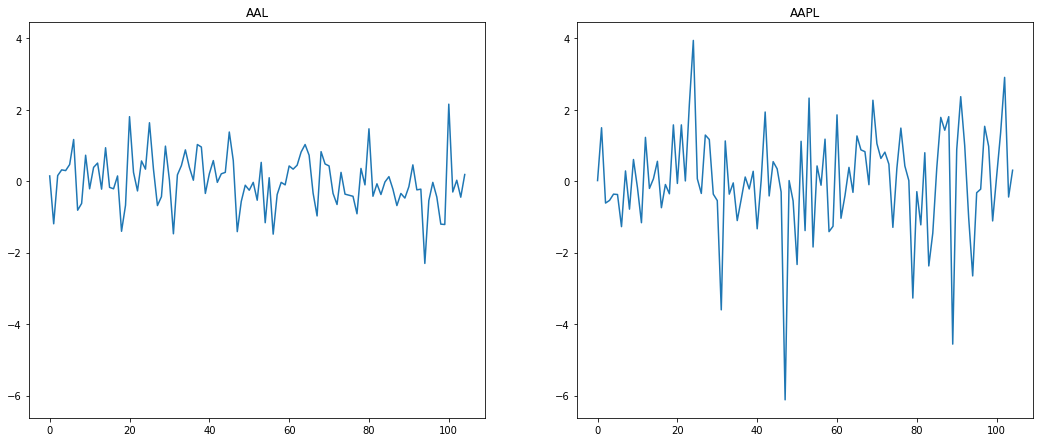

In [32]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [33]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

normalized_data = normalizer.fit_transform(movements)

print(normalized_data.max())
print(normalized_data.min())
print(normalized_data.mean())

0.9765840898767176
-0.9591178255477912
-0.000577519123272531


K-Means Clustering

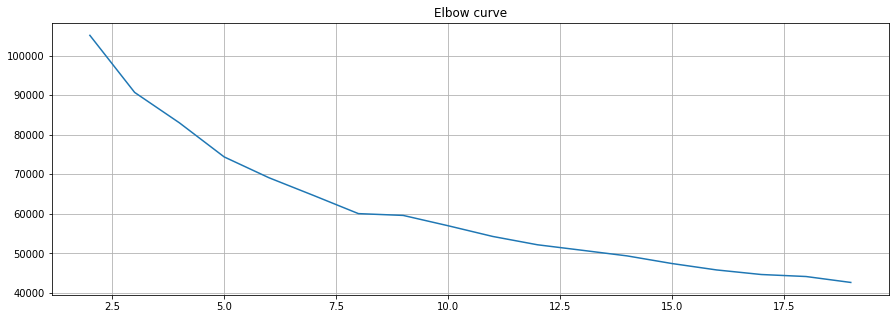

In [34]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

error = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(movements)
    error.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), error)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [35]:
# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [36]:
# fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=1000, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [37]:
print(kmeans.inertia_)

339.7054668491121


In [38]:
# predict the cluster labels.
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# display df sorted by cluster labels
print(df.sort_values('labels'))

     labels companies
172       0        BF
74        0      MDLZ
377       0       NRG
67        0       KHC
273       0       GIS
..      ...       ...
297       9       HST
117       9       WFM
32        9     DISCK
449       9       TGT
97        9      ROST

[500 rows x 2 columns]


In [40]:
np.sort(df.labels.unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [41]:
df.labels.value_counts(ascending =True)

7    25
2    27
4    36
8    48
5    51
0    54
3    58
1    62
6    65
9    74
Name: labels, dtype: int64

In [42]:
#do a linear dimensionality reduction using singular value decomposition of the data
# PCA
from sklearn.decomposition import PCA 


# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(normalized_data)

# run kmeans on reduced data
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labels
print(df.sort_values('labels'))
export_to_csv = df.to_csv('stock_portfolio.csv', header= True)

     labels companies
412       0       RCL
71        0       MAR
36        0      EBAY
109       0       TXN
81        0      NFLX
..      ...       ...
176       9       BLL
312       9       JNJ
465       9       UNH
148       9       AMT
499       9       ZTS

[500 rows x 2 columns]


<Figure size 432x288 with 0 Axes>

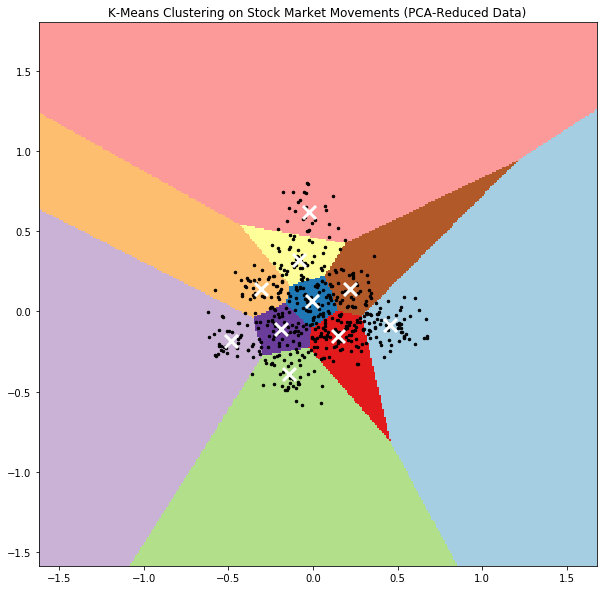

In [43]:
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()